In [1]:
#Assignment Task:
"""Your task is to perform a multiple linear regression analysis to 
predict the price of Toyota corolla based on the given attributes."""

#Taskes:
"""1.Perform exploratory data analysis (EDA) to gain insights into 
the dataset. Provide visualizations and summary statistics 
of the variables. Pre process the data to apply the MLR."""

import pandas as pd
df=pd.read_csv("D:/DATA SCIENCE EXCELR/Data/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [4]:
#label encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Fuel_Type']=LE.fit_transform(df['Fuel_Type'])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [5]:
#correlation
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


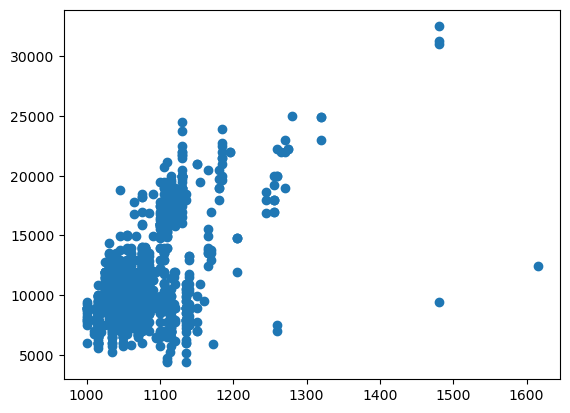

In [6]:
#scatter plot
Y=df["Price"]
X=df[["Weight"]]
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

In [7]:
# collecting X columns
df.iloc[:,1:11]

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df.iloc[:,1:11]=SS.fit_transform(df.iloc[:,1:11])
df.iloc[:,1:11]

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0,-0.140425,1.758561
1,-1.771966,0.117454,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0,-0.140425,1.758561
2,-1.718184,-0.715386,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0,-0.140425,1.758561
3,-1.610620,-0.547650,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0,-0.140425,1.758561
4,-1.395491,-0.801028,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0,-0.140425,-0.901883
1432,0.863362,-1.321120,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0,-0.140425,-1.091915
1433,0.809579,-1.374036,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0,-0.140425,-1.091915
1434,0.755797,-1.376703,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0,-0.140425,-1.091915


In [9]:
#declaring X variable
X=df.iloc[:,1:11]

In [10]:
#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [11]:
"""3.Build a multiple linear regression model using the training dataset. 
Interpret the coefficients of the model. Build minimum of 3 different models."""

#defining the linear regression function

# MODEL-1

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train) #fitting into linear regression model

LinearRegression()

In [12]:
#predict test and train Y variable 
Y_pred_train=LR.predict(X_train)
Y_pred_test=LR.predict(X_test)

#Calculate the error
import numpy as np
from sklearn.metrics import mean_squared_error
print("Training Mean Squared error: ",np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(2))
print("Testing Mean Squared error: ",np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(2))

Training Mean Squared error:  1315.49
Testing Mean Squared error:  1384.15


In [13]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

#cross validation
train_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    train_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation training error:",np.mean(train_error).round(2))
print("Cross validation testing error:",np.mean(test_error).round(2))

Cross validation training error: 1320.98
Cross validation testing error: 1482.6


In [14]:
# The error of testing and training has a lot of difference, so the model-1is not a good model 

In [15]:
#extracting the linear regression coefficients
LR.coef_

array([-2.15539815e+03, -6.45043454e+02,  5.37576444e+02,  2.63335693e+02,
        3.03277640e+01, -5.39499557e+01, -8.33326456e+01,  3.97903932e-13,
        1.11755905e+02,  1.54078310e+03])

In [16]:
#Ridge Regression
from sklearn.linear_model import Ridge
RR=Ridge(alpha=1.0)
RR.fit(X,Y) #fitting into ridge regression model
RR.coef_ # extracting the ridge coefficients

array([-2299.54272972,  -658.51401189,   213.62845574,   354.60761434,
          69.19731985,   -23.96682852,   -28.10184038,     0.        ,
         117.25746435,  1092.6273486 ])

In [17]:
#display list of columns
list(X)

['Age_08_04',
 'KM',
 'Fuel_Type',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [18]:
#Display columns with their respective linear and ridge coefficients
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(LR.coef_),pd.DataFrame(RR.coef_)],axis=1)

,0,0,0
0,Age_08_04,-2.155398e+03,-2299.542730
1,KM,-6.450435e+02,-658.514012
2,Fuel_Type,5.375764e+02,213.628456
3,HP,2.633357e+02,354.607614
4,Automatic,3.032776e+01,69.197320
5,cc,-5.394996e+01,-23.966829
6,Doors,-8.333265e+01,-28.101840
7,Cylinders,3.979039e-13,0.000000
8,Gears,1.117559e+02,117.257464
9,Weight,1.540783e+03,1092.627349


In [19]:
#Lasso Regression
from sklearn.linear_model import Lasso
lass=Lasso(alpha=3)     # declaring lasso function with alpha=3
lass.fit(X,Y)           #fit into lasso function
lass.coef_              #lasso coefficients

array([-2300.13811271,  -658.41564533,   208.82974199,   354.32576627,
          66.68902034,   -20.08138798,   -23.81191722,     0.        ,
         115.26033263,  1085.29397497])

In [20]:
#Display columns with their respective linear and lasso coefficients
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(LR.coef_),pd.DataFrame(lass.coef_)],axis=1)

,0,0,0
0,Age_08_04,-2.155398e+03,-2300.138113
1,KM,-6.450435e+02,-658.415645
2,Fuel_Type,5.375764e+02,208.829742
3,HP,2.633357e+02,354.325766
4,Automatic,3.032776e+01,66.689020
5,cc,-5.394996e+01,-20.081388
6,Doors,-8.333265e+01,-23.811917
7,Cylinders,3.979039e-13,0.000000
8,Gears,1.117559e+02,115.260333
9,Weight,1.540783e+03,1085.293975


In [21]:
#Dropping the least contributed columns
#Model-2
X_new=X.drop(X.columns[[7]],axis=1)
X_new.shape

(1436, 9)

In [22]:
#Cross Validation after dropping columns
train_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    train_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation training error:",np.mean(train_error).round(2))
print("Cross validation testing error:",np.mean(test_error).round(2))

Cross validation training error: 1320.98
Cross validation testing error: 1482.6


In [23]:
"""The error didn't change much even after removing one unneccesary column.
So the model-2 is gives the same outcome as model-1 and is not a good model"""

"The error didn't change much even after removing one unneccesary column.\nSo the model-2 is gives the same outcome as model-1 and is not a good model"

In [24]:
lass=Lasso(alpha=20) #lasso function with alpha=20
LR.fit(X_new,Y)
lass.fit(X_new,Y)
pd.concat([pd.DataFrame(list(X_new)),pd.DataFrame(LR.coef_),pd.DataFrame(lass.coef_)],axis=1)

,0,0,0
0,Age_08_04,-2301.559224,-2292.832444
1,KM,-657.568438,-662.548573
2,Fuel_Type,214.589149,175.693768
3,HP,354.464921,354.239677
4,Automatic,69.289910,52.084339
5,cc,-24.153965,-0.000000
6,Doors,-28.492089,-0.000000
7,Gears,117.215837,103.660393
8,Weight,1093.141702,1042.004540


In [25]:
#Model-3
X_new=X_new.drop(X.columns[[5,6]],axis=1)
X_new.shape

(1436, 7)

In [26]:
train_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    train_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Cross validation training error:",np.mean(train_error).round(2))
print("Cross validation testing error:",np.mean(test_error).round(2))

Cross validation training error: 1325.39
Cross validation testing error: 1366.75


In [27]:
"""The testing and training errors are almost same.
So Model-3 is the most effiecient and good model among the three models. """

'The testing and training errors are almost same.\nSo Model-3 is the most effiecient and good model among the three models. '